In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

# Load Data

In [2]:
# Load Data
data = pd.read_csv('data1.txt', header=None)
X = data.iloc[:, [0, 1]]
y = data.iloc[:, [2]]

data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Plot Data

In [3]:
def plotData(X, y):
    # Visualize Data
    pos = np.where(y == 1)
    neg = np.where(y == 0)

    plt.plot(X.iloc[pos[0]][0], X.iloc[pos[0]][1], 'k+', linewidth='2', markersize='7')
    plt.plot(X.iloc[neg[0]][0], X.iloc[neg[0]][1], 'ko', markerfacecolor='y', markersize='7')

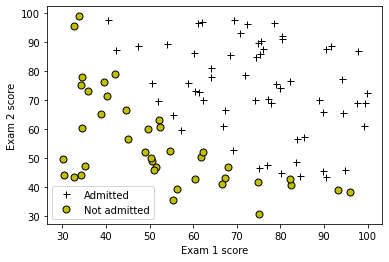

In [4]:
# plot the data
plotData(X, y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])
plt.show()

# Implemented Logistic Regression

In [5]:
# Sigmoid Function
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [6]:
# Sigmoid Function Check
sigmoid(np.array([-1, 0, 1]))

array([0.26894142, 0.5       , 0.73105858])

### Cost Function

In [7]:
def costFunction(theta, X, y):
    # map predicted values to probabilities, between 1 and 0
    h = sigmoid(X.dot(theta))
    
    # Cost function of Logistic Regression
    J = 1/m * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))
    # Optimize the cost function
    grad = (1/m) * X.T.dot(h - y)
    return J, grad

In [8]:
[m, n] = X.shape
# Add intercept term to X
X_b = np.c_[np.ones((m, 1)), X]
# Initialize zero theta
zero_theta = np.zeros((n + 1, 1))

### Compute Cost Function and Gradient using the Implemented Gradient Descent

In [9]:
# Cost function for all theta zero
[z_cost, z_grad] = costFunction(zero_theta, X_b, y)
print("Cost at initial theta (zeros):\t{}".format(z_cost.iloc[0][0]))

Cost at initial theta (zeros):	0.6931471805599452


In [10]:
# Gradient for all theta zero
print("Gradient at initial theta (zeros):\n\tTheta_0: {}\t\n\tTheta_1: {}\n\tTheta_3: {}"
      .format(z_grad[0][0], z_grad[1][0], z_grad[2][0]))

Gradient at initial theta (zeros):
	Theta_0: -0.1	
	Theta_1: -12.009216589291153
	Theta_3: -11.262842205513593


In [11]:
# Compute and display cost and gradient with non-zero theta
non_zero_theta = np.array([[-24], [0.2], [0.2]])
[nz_cost, nz_grad] = costFunction(non_zero_theta, X_b, y)

print("Cost at initial theta (non-zero):\t{}".format(nz_cost.iloc[0][0]))

Cost at initial theta (non-zero):	0.21833019382659793


In [12]:
# Gradient for non-zero theta
print("Gradient at initial theta (non-zero):\n\tTheta_0: {}\t\n\tTheta_1: {}\n\tTheta_3: {}"
      .format(nz_grad[0][0], nz_grad[1][0], nz_grad[2][0]))

Gradient at initial theta (non-zero):
	Theta_0: 0.0429029948995345	
	Theta_1: 2.5662341155107584
	Theta_3: 2.6467973710824357


# Sklearn Logistic Regression

In [13]:
# Sklearn Logistic Regression
y = data.iloc[:, 2]
log_reg = LogisticRegression()
log_reg.fit(X, y)
sk_grad = np.c_[log_reg.intercept_, log_reg.coef_[0][0], log_reg.coef_[0][1]]
sk_grad = sk_grad.T

print("Gradient at initial theta (non-zero):\n\tTheta_0: {}\t\n\tTheta_1: {}\n\tTheta_3: {}"
      .format(sk_grad[0][0], sk_grad[1][0], sk_grad[2][0]))

Gradient at initial theta (non-zero):
	Theta_0: -25.052193143127436	
	Theta_1: 0.20535491218577973
	Theta_3: 0.20058380395530137


# Plot Decision Boundary

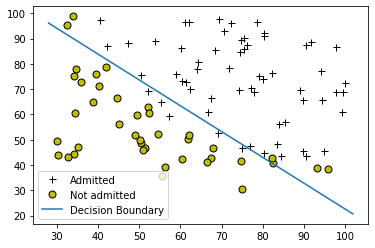

In [14]:
# Plot Decision Boundary
plotData(X, y)
plot_x = np.c_[(X.iloc[:, 0].min())-2, (X.iloc[:, 0].max())+2]
plot_y = (-1 / sk_grad[2][0]) * (sk_grad[1][0] * plot_x  + sk_grad[0][0])

plt.plot(plot_x[0], plot_y[0], '-')
plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
plt.show()

# Prediction and Accuracy

In [15]:
# Predict 48 and 85 if Admitted or Not
X_t = np.array([[48, 85]])
predict = log_reg.predict(X_t)[0]

# Add bias term
X_t = np.c_[1, X_t]
prob = sigmoid(X_t.dot(sk_grad))

print("For a student with scores 45 and 85, we predict an admission probability of: {}".format(prob[0][0]))
print("Predicted: {}\tAdmitted!".format(predict))

For a student with scores 45 and 85, we predict an admission probability of: 0.8646506077702494
Predicted: 1	Admitted!


In [16]:
print("Train Accuracy: {}".format(log_reg.score(X, y)))

Train Accuracy: 0.89
